# Hate speech detection with tf-idf and logistic regression  
> The data used for this project has been downloaded from Kaggle. It is divided into train and test sets and contains texts labelled by 0/1 where 0 indicates the text contains no hate speech/ offensive language and 1 indicates that the text does contain hate/ offensive language. The data has been cleaned and processed using regular expressions and other cleaning techniques using nltk library and custom code. Term-frequency Inverse Document frequency (tf-idf) has been used to convert the text into vectors and a tri-gram language model has been used. Then logistic regression has been used as the machine learning model which did pretty well, with an accuracy of around 93%. This is a smple project but can be extended to a more complex one, by introducing the latest pre-trained models for NLP and relevant libraries.

### We import the essential libs first

In [55]:
import pandas as pd               
import numpy as np                
import re                         
import seaborn as sns             
import matplotlib.pyplot as plt   
from matplotlib import style    
style.use("ggplot")
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize     
from nltk.stem import WordNetLemmatizer #to link words with similar meanings to one word. 
from nltk.corpus import stopwords            
stop_words = set(stopwords.words("english"))
from wordcloud import WordCloud             
from sklearn.feature_extraction.text import TfidfVectorizer    
from sklearn.model_selection import train_test_split          
from sklearn.linear_model import LogisticRegression            
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tawhid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tawhid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tawhid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tawhid\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [57]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
 6   labels              24783 non-null  object
dtypes: int64(5), object(2)
memory usage: 1.3+ MB


In [59]:
train_df["tweet"][:10]

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
5    [2/2] huge fan fare and big talking before the...
6     @user camping tomorrow @user @user @user @use...
7    the next school year is the year for exams.ð...
8    we won!!! love the land!!! #allin #cavs #champ...
9     @user @user welcome here !  i'm   it's so #gr...
Name: tweet, dtype: object

#### Now to start processing the data

In [60]:
def data_processing(tweet):
    tweet=tweet.lower()
    tweet=re.sub(r"https\S+|www\S+http\S+",'',tweet,flags=re.MULTILINE)
    tweet=re.sub(r"\@w+|\#",'',tweet)
    tweet=re.sub(r"[^\w\s]",'',tweet)
    tweet=re.sub(r"ð",'',tweet)  #removing punctuations
    tweet_tokens=word_tokenize(tweet)
    filtered_tweets=[w for w in tweet_tokens if not w in stop_words] 
    return " ".join(filtered_tweets)

In [61]:
train_df["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [62]:
train_df["tweet"] = train_df["tweet"].apply(data_processing)

In [48]:
# using regular expressions here mostly to clean the text
from nltk.corpus import stopwords
import nltk
sw = stopwords.words('english')
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    # text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in sw]
    text=" ".join(text)
    # text = [stemmer.stem(word) for word in text.split(' ')]
    #text=" ".join(text)
    return text

In [63]:
# drop duplicates
train_df=train_df.drop_duplicates("tweet")

In [64]:
lemmatizer=WordNetLemmatizer()
def lemmatizing(data):
    tweet=[lemmatizer.lemmatize(word) for word in data]
    return data

In [65]:
train_df['tweet']=train_df['tweet'].apply(lambda x: lemmatizing(x))

In [66]:
train_df["tweet"][:10]

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
2                                       bihday majesty
3                          model love u take u time ur
4                        factsguide society motivation
5    22 huge fan fare big talking leave chaos pay d...
6    user camping tomorrow user user user user user...
7    next school year year exams cant think school ...
8    love land allin cavs champions cleveland cleve...
9                             user user welcome im gr8
Name: tweet, dtype: object

> the pre-processing looks great. now to move on to the next stage.

<AxesSubplot:xlabel='label', ylabel='count'>

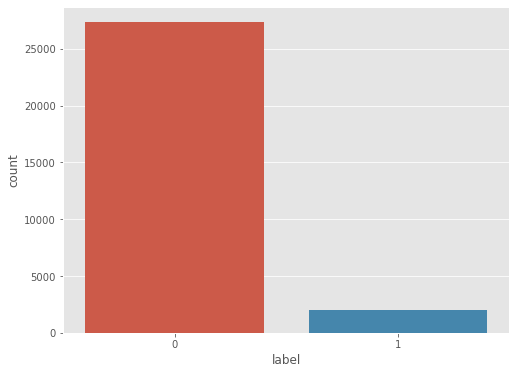

In [67]:
fig=plt.figure(figsize=(8,6))
sns.countplot(x='label', data=train_df)

Text(0.5, 1.0, 'depiction of hate vs normal speech (0=normal,1=hate)')

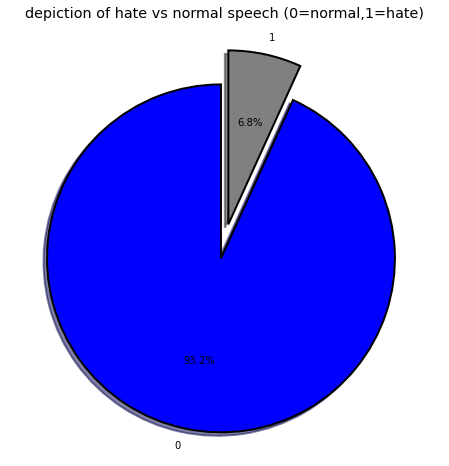

In [72]:
#piechart
fig=plt.figure(figsize=(8,8))
colors=('blue', 'grey')
wp={'linewidth':2, "edgecolor":'black'}
tags=train_df['label'].value_counts()
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, 
          startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title("depiction of hate vs normal speech (0=normal,1=hate)")

In [73]:
normal_tweets = train_df[train_df.label==0]
normal_tweets.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


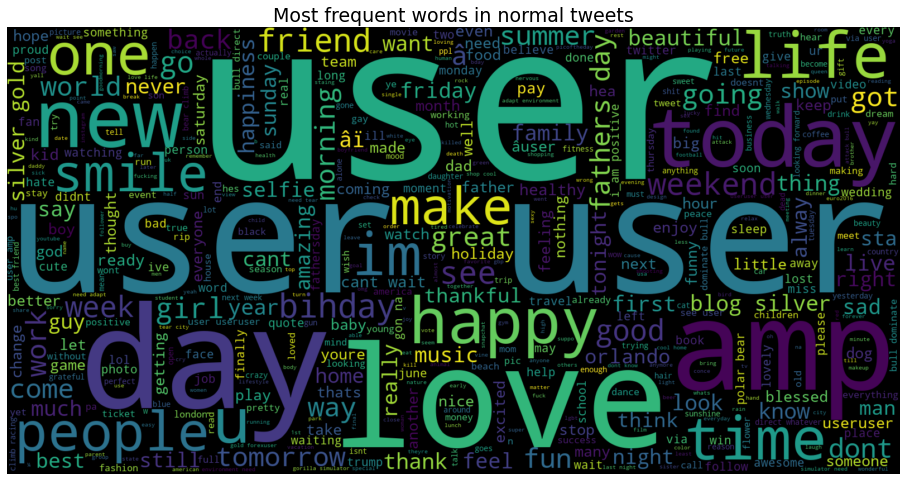

In [75]:
text=''.join([word for word in normal_tweets['tweet']])
plt.figure(figsize=(16,10), facecolor='None')
wordcloud=WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in normal tweets", fontsize=19)
plt.show()

### Now to vectorize the data for modelling 

In [76]:
#vectorizing the text data using TfidVectorizer and create a bigram lanuage model
vec = TfidfVectorizer(ngram_range=(1,2)).fit(train_df['tweet'])

In [80]:
feats = vec.get_feature_names_out()
print("Number of features: {}\n".format(len(feats)))
print("First 100 features: \n",feats[:20])

Number of features: 208579

First 100 features: 
 ['0000001' '0000001 polluting' '00027' '00027 photooftheday' '001' '0035'
 '00h30' '01' '01 4995' '01 7900' '01 blog' '01 croatia' '01 may'
 '01 shopalyssas' '0115' '0115 8599968' '0161' '0161 manny' '019'
 '019 previous']


In [83]:
# trigram language model
vec2 = TfidfVectorizer(ngram_range=(1,3)).fit(train_df['tweet'])
feats2 = vec2.get_feature_names_out()
print("Number of features: {}\n".format(len(feats2)))
print("First 100 features: \n",feats2[:20])

Number of features: 380305

First 100 features: 
 ['0000001' '0000001 polluting' '0000001 polluting niger' '00027'
 '00027 photooftheday' '00027 photooftheday music' '001' '0035' '00h30'
 '01' '01 4995' '01 4995 rustic' '01 7900' '01 7900 shopalyssas' '01 blog'
 '01 blog silver' '01 croatia' '01 croatia happy' '01 may' '01 may actual']


In [85]:
X = train_df['tweet']
Y = train_df['label']
X = vec2.transform(X)

In [86]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=23)

In [87]:
print("Size of x_train", (x_train.shape))
print("Size of y_train", (y_train.shape))
print("Size of x_test", (x_test.shape))
print("Size of x_test", (x_test.shape))

Size of x_train (20541, 380305)
Size of y_train (20541,)
Size of x_test (8804, 380305)
Size of x_test (8804, 380305)


In [88]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train) 
logreg_predict = logreg.predict(x_test)  
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100)) 

Test accuarcy: 93.29%


In [89]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[8202    2]
 [ 589   11]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.97      8204
           1       0.85      0.02      0.04       600

    accuracy                           0.93      8804
   macro avg       0.89      0.51      0.50      8804
weighted avg       0.93      0.93      0.90      8804



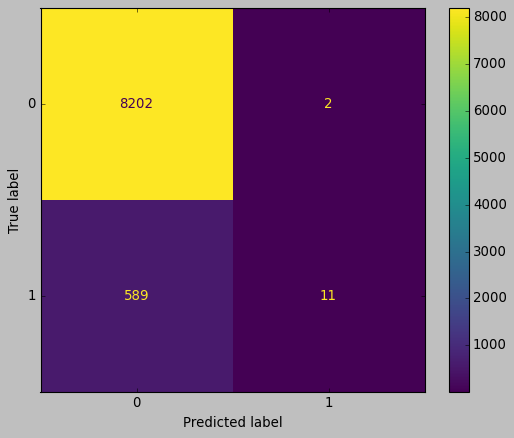

In [90]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

As we can see, our logistic regression model performs well. Next task would be to try out the test data with the model. Thanks!